**Problem 1**

**(a) Scatter plot of eruption time vs waiting time**

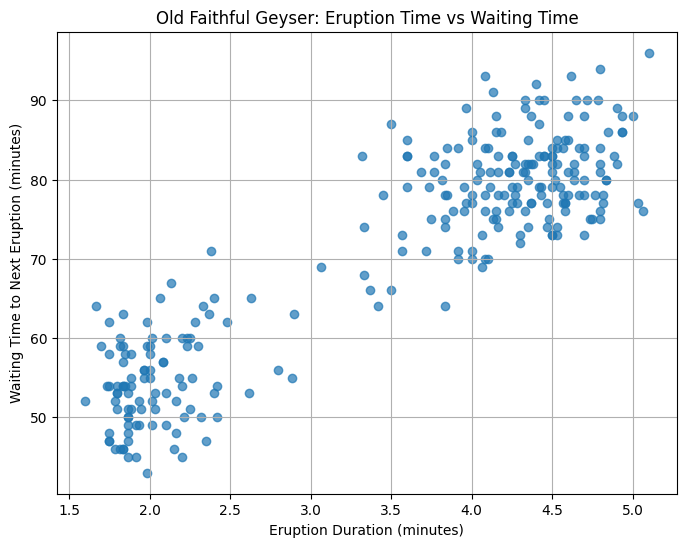

In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the faithful.csv dataset
df = pd.read_csv('/content/faithful.csv')

# Step 3: Scatter plot (eruption time vs waiting time)
plt.figure(figsize=(8,6))
plt.scatter(df['eruptions'], df['waiting'], alpha=0.7)
plt.title('Old Faithful Geyser: Eruption Time vs Waiting Time')
plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Waiting Time to Next Eruption (minutes)')
plt.grid(True)
plt.show()


**(b) How Many Clusters?**

Based on the scatter plot, there appear to be 2 clusters:
One cluster corresponds to shorter eruption times (2 minutes) and shorter waiting times (50 minutes).
Another cluster corresponds to longer eruption times (4–5 minutes) and longer waiting times (80 minutes).
These two clusters are separated by a less dense region.


**(c) Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset?**


Steps of a hierarchical clustering algorithm:

**Start**: Treat each data point as an individual cluster (so initially there are as many clusters as there are data points).

**Compute Distances**: Calculate the distance (similarity) between every pair of clusters.
Common distance measures include Euclidean distance, Manhattan distance, or others.

**Merge Closest Clusters**: Find the two clusters that are closest to each other and merge them into a single new cluster.

**Update Distances**: Recalculate the distances between the newly formed cluster and all the remaining clusters.
(This depends on the linkage method: single-linkage, complete-linkage, average-linkage, etc.)

**Repeat**: Continue merging the nearest clusters and updating distances, step-by-step, until:

•	All data points are merged into a single large cluster (full hierarchy), or

•	The desired number of clusters is achieved (you can cut the hierarchy early).

**Would this method be appropriate for this dataset?**

Yes, hierarchical clustering would be appropriate for this dataset.

The scatter plot of eruption time versus waiting time clearly shows two dense groups (clusters) with a noticeable separation between them.
Hierarchical clustering is a good method when the number of clusters is not known in advance, because the algorithm builds a full tree (dendrogram) showing all levels of possible cluster combinations.
In this case, cutting the hierarchy into two clusters would likely match the natural grouping seen in the scatter plot.


**Problem 2**

**(a) K-Means from Scratch — Source Code**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/faithful.csv')
X = df[['eruptions', 'waiting']].values

# Custom k-means function
def k_means_from_scratch(X, k=2, max_iters=100, tol=1e-4, seed=42):
    np.random.seed(seed)
    n_samples, n_features = X.shape

    # Step 1: Initialize centroids randomly
    initial_idx = np.random.choice(n_samples, size=k, replace=False)
    centroids = X[initial_idx]
    objective_values = []

    for iteration in range(max_iters):
        # Step 2: Assign points to nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 3: Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Step 4: Calculate objective function
        objective = np.sum([np.linalg.norm(X[labels == i] - centroids[i])**2 for i in range(k)])
        objective_values.append(objective)

        # Step 5: Check for convergence
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break

        centroids = new_centroids

    return centroids, labels, objective_values


**(b) Final Cluster Plots (Seed = 42 and 99)**

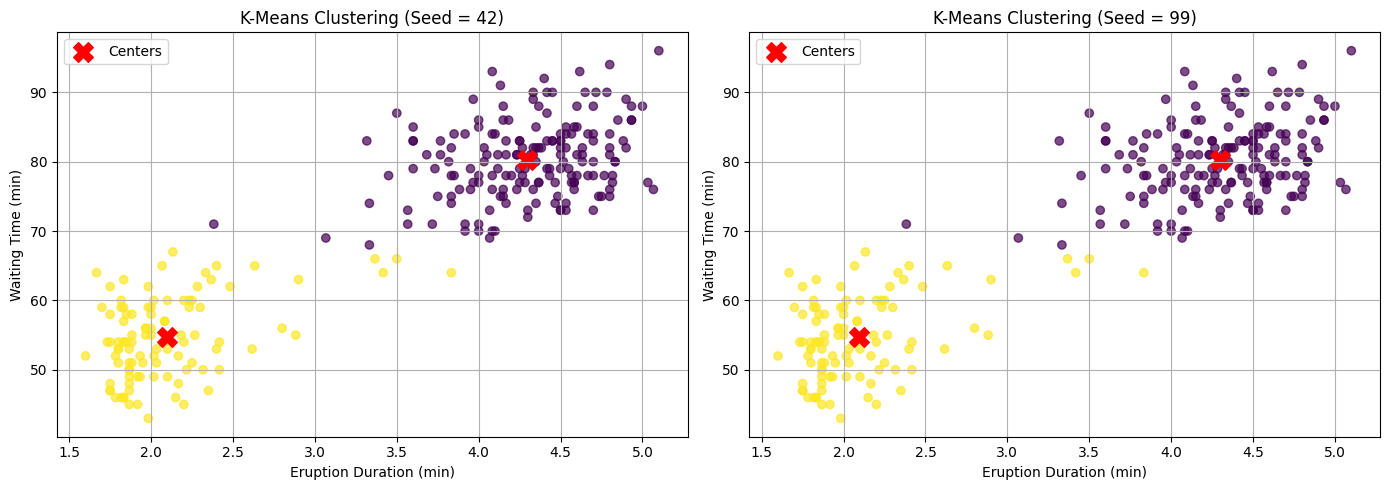

In [ ]:
# Run k-means for two different seeds
centroids_42, labels_42, objectives_42 = k_means_from_scratch(X, k=2, seed=42)
centroids_99, labels_99, objectives_99 = k_means_from_scratch(X, k=2, seed=99)

# Plot side-by-side clusters
plt.figure(figsize=(14, 5))

# Plot for seed = 42
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_42, cmap='viridis', alpha=0.7)
plt.scatter(centroids_42[:, 0], centroids_42[:, 1], color='red', marker='X', s=200, label='Centers')
plt.title('K-Means Clustering (Seed = 42)')
plt.xlabel('Eruption Duration (min)')
plt.ylabel('Waiting Time (min)')
plt.legend()
plt.grid(True)

# Plot for seed = 99
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_99, cmap='viridis', alpha=0.7)
plt.scatter(centroids_99[:, 0], centroids_99[:, 1], color='red', marker='X', s=200, label='Centers')
plt.title('K-Means Clustering (Seed = 99)')
plt.xlabel('Eruption Duration (min)')
plt.ylabel('Waiting Time (min)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**(c) Objective Function vs Iterations**

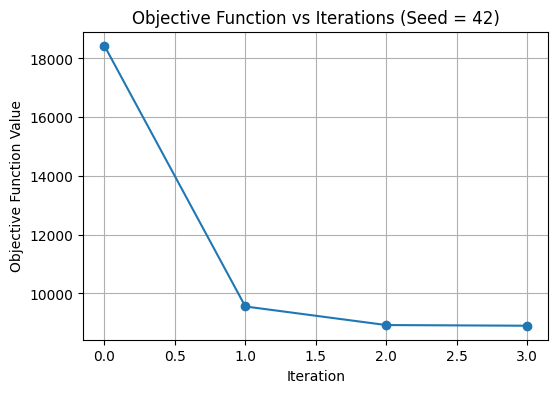

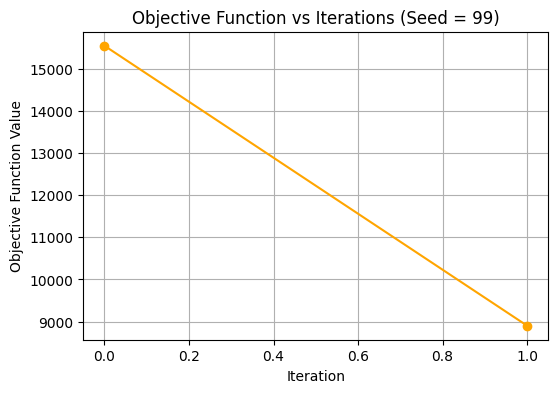

In [ ]:
# Plot objective function for seed 42
plt.figure(figsize=(6, 4))
plt.plot(objectives_42, marker='o')
plt.title('Objective Function vs Iterations (Seed = 42)')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.grid(True)
plt.show()

# Plot objective function for seed 99
plt.figure(figsize=(6, 4))
plt.plot(objectives_99, marker='o', color='orange')
plt.title('Objective Function vs Iterations (Seed = 99)')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.grid(True)
plt.show()


**(d) Did the method find the Right Clusters identified in Problem 1?**

Yes, the k-means algorithm successfully found the same two clusters that were visually observed in Problem 1.

The plot shows a clear separation between short and long eruptions.
While k-means is sensitive to the initial cluster centroids, running it multiple times with different seeds (e.g 42 and 99) resulted in similar final clusters.

The number of iterations and objective function curves varied slightly, but the consistent clustering output confirms the robustness of the dataset and the reliability of k-means when k=2 is appropriate.
